<a href="https://colab.research.google.com/github/JLuceroVasquez/challenge-telecom-x-latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafío TelecomX
La empresa TelecomX enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

En este desafío se recopiló, procesó y analizó los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir del análisis, la empresa podrá realizar modelos predictivos y desarrollar estrategias para reducir la evasión.

In [1]:
#Se importan los requisitos
import requests #Para leer los datos del API.
import json #Para cargar los datos del API como una lista de diccionario.
import pandas as pd #Para cargar los datos del API en una dataframe de Pandas.
import numpy as np #Para configurar el tipo de datos en columnas.
import matplotlib.pyplot as plt #Para graficar los diagramas de dispersión y línea de tendencia.
import matplotlib.axes #Para el tipado tyhints en las funciones que grafican sobre ejes.
from typing import Dict, Any, Optional #Para el tipado tyhints en las funciones que grafican sobre ejes.
import seaborn as sns #Para graficar los diagramas de boxplot y pointplot.
from plotly.subplots import make_subplots #Para crear figuras Plotly con muchos ejes.
import plotly.graph_objects as go #Para añadir gráficos a figuras Plotly con muchos ejes.

##📌 Extracción

In [2]:
#Se almacena la dirección URL de la API en una variable de alcance global.
url = 'https://github.com/ingridcristh/challenge2-data-science-LATAM/raw/refs/heads/main/TelecomX_Data.json'

#Cargamos la consulta a la API en la variable datos_churn.
datos_churn = requests.get(url)
type(datos_churn)

requests.models.Response

In [3]:
#Convertimos los datos de la consulta en texto con el método text.
#Almacenamos los datos leidos como texto en la variable resultado.
resultado = json.loads(datos_churn.text)
#La API transmite los datos en una lista de diccionario, que hemos cargado en la variable resultado.
type(resultado)

list

In [4]:
#Convertimos los datos de la lista de diccionario en un dataframe con la función pd.DataFrame().
df = pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
#Usamos el método pd.json_normalize para convertir los datos anidados en columnas.
df_plano = pd.json_normalize(resultado)
df_plano.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##🔧 Transformación

###Conoce el conjunto de datos
Se encontró que ninguna columna tiene valores nulos. Y se cambió el nombre de las columnas para que coincidan con el diccionario de datos.

In [6]:
#Se consulta la cantidad de registros no nulos y el tipo de datos de cada columna.
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
#Se renombran las columnas para estar alineados al diccionario de datos.
dict_columnas = {'customer.gender':'gender', 'customer.SeniorCitizen':'SeniorCitizen'
                 ,'customer.Partner':'Partner', 'customer.Dependents':'Dependents',
                 'customer.tenure':'tenure', 'phone.PhoneService':'PhoneService',
                 'phone.MultipleLines':'MultipleLines', 'internet.InternetService':'InternetService',
                 'internet.OnlineSecurity':'OnlineSecurity', 'internet.OnlineBackup':'OnlineBackup',
                 'internet.DeviceProtection':'DeviceProtection', 'internet.TechSupport':'TechSupport',
                 'internet.StreamingTV':'StreamingTV', 'internet.StreamingMovies':'StreamingMovies',
                 'account.Contract':'Contract', 'account.PaperlessBilling':'PaperlessBilling',
                 'account.PaymentMethod':'PaymentMethod', 'account.Charges.Monthly':'Charges.Monthly',
                 'account.Charges.Total':'Charges.Total'}

df_plano.rename(dict_columnas, axis=1, inplace=True)
df_plano.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

###Comprobación de incoherencia en los datos
En esta etapa se prestó atención a valores nulos, ausentes, duplicados, errores de formato e inconsistencias en las categorías. Aunque no hay valores duplicados y no hay valores nulos, se encontraron las siguientes incoherencias:
- **Columnas**: Los nombres tienen mayusculas, minúsculas y puntos.
- **`Churn`**: Tiene 224 registros con valores ausentes.
- **`Charges.Total`**: Tiene 11 registros con valores ausentes. También tiene error de formato. Debe ser de tipo float.

Además, para facilitar el procesamiento matemático y comprensión de la información, se realizó:
- **Traducción**: A español de las columnas `gender`, `PaymentMethod` y `Contract`.
- **Cambio del tipo de dato**: A bool de las columnas `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,` StreamingTV`, `StreamingMovies` y `PaperlessBilling`.



####Valores únicos en cada columna

In [8]:
#Se consulta los valores únicos en cada columna, y sin son menores de 10 se muestran.
for columna in df_plano.columns:
  valores = df_plano[columna].unique()
  cantidad = len(valores)
  print(f'La columna "{columna}" tiene {cantidad} valores únicos.')
  if cantidad < 10:
    print(valores)
    print('-'*50)

La columna "customerID" tiene 7267 valores únicos.
La columna "Churn" tiene 3 valores únicos.
['No' 'Yes' '']
--------------------------------------------------
La columna "gender" tiene 2 valores únicos.
['Female' 'Male']
--------------------------------------------------
La columna "SeniorCitizen" tiene 2 valores únicos.
[0 1]
--------------------------------------------------
La columna "Partner" tiene 2 valores únicos.
['Yes' 'No']
--------------------------------------------------
La columna "Dependents" tiene 2 valores únicos.
['Yes' 'No']
--------------------------------------------------
La columna "tenure" tiene 73 valores únicos.
La columna "PhoneService" tiene 2 valores únicos.
['Yes' 'No']
--------------------------------------------------
La columna "MultipleLines" tiene 3 valores únicos.
['No' 'Yes' 'No phone service']
--------------------------------------------------
La columna "InternetService" tiene 3 valores únicos.
['DSL' 'Fiber optic' 'No']
------------------------

####Registros nulos

In [9]:
#Se imprime la cantidad de registros nulos.
print(f'Cantidad de registros nulos:\n{df_plano.isnull().sum()}')

Cantidad de registros nulos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


####Registros duplicados

In [10]:
#Se imprime la cantidad de registros duplicados.
print('La cantidad de registros duplicados son:',df_plano.duplicated().sum())

La cantidad de registros duplicados son: 0


####Registros vacíos

In [11]:
#Se calcula la cantidad de registros vacíos por columna.
'''
Se elimina los espacios vacíos al inicio y final de cada valor de la columna.
Previamente se convierten los valores a string para poder aplicar el .str y
consecuentemente el .strip().
Lo anterior devuelve una serie de Pandas con valores booleanos, donde True
coincide con celdas vacías y que al aplicarse el método.sum() se suman como 1.
Como resultado, se obtiene una serie cuyos índices son el nombre de columnas y
los valores son la cantidad de celdas vacías.
'''
df_plano.apply(lambda x: x.astype(str).str.strip()=='').sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


###Manejo de inconsistencias
- **Columnas**: Todos los nombres están en minúsculas y separados por guiones bajos.
- **`Churn`**: No tiene registros con valores ausentes.
- **`Charges.Total`**: Es de tipo float, teniendo como valor NaN en los registros donde hubieron valores ausentes.

####Nombres de columnas

In [12]:
#Se escriben los nombres de las columnas en minúsculas y con guiones bajos en lugar de espacios.
df_plano.columns = df_plano.columns.str.lower().str.replace('.', '_')
df_plano.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

####Columna **`Churn`**

In [13]:
#Se eliminan los registros con valores vacíos en Churn mediante indexación booleana.
df_plano = df_plano[df_plano.churn !='']
#Se consulta la cantidad de registros según el valor en la columna churn.
df_plano.churn.value_counts()

,count
churn,
No,5174
Yes,1869


####Columna **`Charges.Total`**

In [14]:
#En la etapa anterior, se conoció que hay 11 registros vacíos.
#Se eliminan espacios al inicio y final de cada registro.
df_plano['charges_total'].apply(lambda x: x.strip())

,charges_total
0,593.3
1,542.4
2,280.85
3,1237.85
4,267.4
...,...
7262,742.9
7263,1873.7
7264,92.75
7265,4627.65


In [15]:
#Se corrobora cuantos registros de la columna contienen caracteres especiales o están vacíos.
'''
Se utiliza dos condiciones en una sola expresión regular:

  - [^\d.]
    para identificar caractéres que no sean números o 1 punto.

  - (?=(?:.*\\.){2,})
    para identificar la presencia múltiples puntos.

  - ^$
    para identificar si el registro está vacío.
'''
regex = r'[^\d.]|(?=(?:.*\.){2,})|^$'
df_plano['charges_total'].str.contains(regex, regex=True).sum()

np.int64(11)

In [16]:
#Se encontraron 11 registros con formatos problemáticos, se visualizan para ver si se pueden rescatar.
df_plano.charges_total[df_plano.charges_total.str.contains(regex, regex=True)]

,charges_total
975,
1775,
1955,
2075,
2232,
2308,
2930,
3134,
3203,
4169,


In [17]:
#Se comprueba que los 11 registros están vacíos, y se procede con la conversión.
'''
El parámetro coerce indica que los errores de conversión serán tratados como valore nulos.
'''
df_plano['charges_total'] = pd.to_numeric(df_plano['charges_total'], errors='coerce', downcast='float')
df_plano['charges_total'].dtypes

/tmp/ipython-input-17-2982364039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano['charges_total'] = pd.to_numeric(df_plano['charges_total'], errors='coerce', downcast='float')


dtype('float32')

In [18]:
df_plano.charges_total[df_plano.charges_total.isna()]

,charges_total
975,NaN
1775,NaN
1955,NaN
2075,NaN
2232,NaN
2308,NaN
2930,NaN
3134,NaN
3203,NaN
4169,NaN


###Estandarización y transformación de datos
- **Se tradujo**: A español de las columnas `gender`, `churn`, `InternetService`, `PaymentMethod` y `Contract`.
- **Se cambio el tipo de dato**: A bool de las columnas `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,` StreamingTV`, `StreamingMovies` y `PaperlessBilling`.

####Traducción al español de columnas

In [19]:
#Se remplazaron los valores de la columna gender por su traducción en español.
df_plano['gender'] = df_plano['gender'].apply(lambda x: x.replace('Female','Femenino').replace('Male','Masculino'))
df_plano['gender'].unique()

/tmp/ipython-input-19-1291668722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano['gender'] = df_plano['gender'].apply(lambda x: x.replace('Female','Femenino').replace('Male','Masculino'))


array(['Femenino', 'Masculino'], dtype=object)

In [20]:
#Se remplazaron los valores de la columna churn por su traducción en español.
df_plano['churn'] = df_plano['churn'].apply(lambda x: x.replace('Yes', 'Si'))
df_plano['churn'].unique()

/tmp/ipython-input-20-608041446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano['churn'] = df_plano['churn'].apply(lambda x: x.replace('Yes', 'Si'))


array(['No', 'Si'], dtype=object)

In [21]:
#Se remplazaron los valores de la columna internetservice por su traducción en español.
df_plano.internetservice = df_plano.internetservice.apply(lambda x: x.replace('Fiber optic','Fibra óptica'))
df_plano.internetservice.unique()

/tmp/ipython-input-21-3049026413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano.internetservice = df_plano.internetservice.apply(lambda x: x.replace('Fiber optic','Fibra óptica'))


array(['DSL', 'Fibra óptica', 'No'], dtype=object)

In [22]:
#Se remplazaron los valores de la columna paymentmethod por su traducción en español.
df_plano.paymentmethod = df_plano.paymentmethod.apply(lambda x: x.replace('Mailed check','Cheque por correo').
                                                      replace('Electronic check','Cheque electrónico').
                                                      replace('Credit card (automatic)','Tarjeta de crédito (automático)').
                                                      replace('Bank transfer (automatic)','Transferencia bancaria (automático)'))
df_plano.paymentmethod.unique()

/tmp/ipython-input-22-1116849599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano.paymentmethod = df_plano.paymentmethod.apply(lambda x: x.replace('Mailed check','Cheque por correo').


array(['Cheque por correo', 'Cheque electrónico',
       'Tarjeta de crédito (automático)',
       'Transferencia bancaria (automático)'], dtype=object)

In [23]:
#Se remplazaron los valores de la columna contract por su traducción en español.
df_plano.contract = df_plano.contract.apply(lambda x: x.replace('One year','Un año').
                                            replace('Month-to-month', 'Mes a mes').
                                            replace('Two year', 'Dos años'))
df_plano.contract.unique()

/tmp/ipython-input-23-4224013663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano.contract = df_plano.contract.apply(lambda x: x.replace('One year','Un año').


array(['Un año', 'Mes a mes', 'Dos años'], dtype=object)

####Tipado de columnas booleanas

In [24]:
#Se convierten los valores de la columna "seniorcitizen".
'''
Se empleó el método .astype porque la columna tiene valores numéricos 0 y 1 que
Pandas traduce automáticamente en False y True.
'''
df_plano.seniorcitizen = df_plano.seniorcitizen.astype('bool')
df_plano.seniorcitizen.dtypes

dtype('bool')

In [25]:
#Se convierten los valores de 11 columnas cuyos valores únicos fueron 'yes' y 'no'.
columnas_bool = ['partner', 'dependents', 'phoneservice', 'multiplelines',
                 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                 'techsupport','streamingtv', 'streamingmovies',
                 'paperlessbilling']
df_plano[columnas_bool] = df_plano[columnas_bool].map(lambda x: True if x == 'Yes' else False).astype('bool')
df_plano[columnas_bool].dtypes

,0
partner,bool
dependents,bool
phoneservice,bool
multiplelines,bool
onlinesecurity,bool
onlinebackup,bool
deviceprotection,bool
techsupport,bool
streamingtv,bool
streamingmovies,bool


###Columnas de cuentas diarias y servicios contratados

####Columna nueva: Cuenta diaria

In [26]:
#Se calculan los valores de la columna nueva cuenta_diaria.
df_plano['cuenta_diaria'] = df_plano.charges_monthly / 30
df_plano['cuenta_diaria'].dtypes

dtype('float64')

####Columna nueva: Servicios contratados

In [27]:
#Se calculan los valores de la columna nueva servicios_contratados.
'''
Se suma los valores en las columnas del tipo servicio con los valores tipo bool
de una copia temporal de la columna internet.
'''
columnas_servicios = ['phoneservice', 'multiplelines', 'onlinesecurity',
                      'onlinebackup', 'deviceprotection', 'techsupport',
                      'streamingtv', 'streamingmovies']

df_plano['servicios_contratados'] = df_plano[columnas_servicios].sum(axis=1) + df_plano.internetservice.apply(lambda x: True if x in {'DSL', 'Fibra óptica'} else False)
df_plano['servicios_contratados'].dtypes

dtype('int64')

##📊 Carga y análisis

###Carga

In [28]:
#Se asigna la ubicación donde se descargará el df.
path = '/content/df_plano.json'

#Se exporta el df a un archivo json.
df_plano.to_json(path)

#Se lee el archivo para verificar que se cargó correctamente.
df_plano_exp = pd.read_json(path)
df_plano_exp.head(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuenta_diaria,servicios_contratados
0,0002-ORFBO,No,Femenino,False,True,True,9,True,False,DSL,...,True,True,False,Un año,True,Cheque por correo,65.6,593.299988,2.186667,5
1,0003-MKNFE,No,Masculino,False,False,False,9,True,True,DSL,...,False,False,True,Mes a mes,False,Cheque por correo,59.9,542.400024,1.996667,4
2,0004-TLHLJ,Si,Masculino,False,False,False,4,True,False,Fibra óptica,...,False,False,False,Mes a mes,True,Cheque electrónico,73.9,280.850006,2.463333,3


###Análisis descriptivo

In [29]:
df_plano.describe()

,tenure,charges_monthly,charges_total,cuenta_diaria,servicios_contratados
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300537,2.158723,4.146244
std,24.559481,30.090047,2266.771729,1.003002,2.312720
min,0.000000,18.250000,18.799999,0.608333,1.000000
25%,9.000000,35.500000,401.450012,1.183333,2.000000
50%,29.000000,70.350000,1397.475098,2.345000,4.000000
75%,55.000000,89.850000,3794.737549,2.995000,6.000000
max,72.000000,118.750000,8684.799805,3.958333,9.000000


###Distribución de evasión
En esta sección, se definió la función **`agrupar_prob`** que permite generar dataframes derivados de df_plano donde los índices son variables de agrupamiento y la columna es la probabilidad de churn. Es así que se empleó la **función** e iteraciones **for** para generar listas de dataframes que agrupan la **probabilidad de evasión** por **variables categóricas** y **variables numéricas**.

####Función **`agrupar_prob`**

In [30]:
def agrupar_prob(data: pd.core.frame.DataFrame, cols: list, col_unstack: str, tag_prob: str, name_prob: str) -> pd.core.frame.DataFrame:
  '''
  Función que devuelve un dataframe con el cálculo de probabilidad de una
  variable categórica por cada valor de una o más columnas del dataframe
  original.

  data: pd.core.frame.DataFrame
    Dataframe con los datos originales.
  cols: list
    Lista con los nombres de las columnas que se agruparán. El último nombre
    debe ser el de la columna que contiene los valores de probabilidad.
    Ejemplo: Si se calcula la probabilidad de churn, el último nombre de la
    lista debe coincidir con el de la columna que contiene las etiquetas de "Si"
    dejo o "No" dejo el cliente la empresa.
  col_unstack: str
    Nombre de la columna que contiene los valores de probabilidad.
    Ejemplo: 'churn'.
  tag_prob: str
    Nombre del valor que se contará para calcular la probabilidad.
    Ejemplo: Si se desea calcular la probabilidad de Churn, entonces se
    escribirá 'Si'.
  name_prob: str
    Nombre de la probabilidad calculada.
    Ejemplo: 'churn rate'.
  return = percentdf: pd.core.frame.DataFrame
    Dataframe con las probabilidades calculadas por cada valor de las columnas
    de agrupamiento.
  '''
  if cols[-1] == col_unstack:
    '''
    Las variables de agrupamiento se convierten en índice múltiples de la serie, y
    los valores son la cantidad de registros en cada combinación de índices.
    '''
    groupedserie = data.groupby(by=cols).size()
    '''
    Se convierten los valores del último índice en columnas del dataframe.
    Se completa con cero las celdas donde hay valores NaN.
    '''
    unstackdf = groupedserie.unstack(level=cols[-1], fill_value=0)
    percentdf = (unstackdf[tag_prob]/unstackdf.sum(axis=1))*100
    percentdf.name = name_prob
    return percentdf

  else:
    print(f'Error {cols[-1]} ≠ {col_unstack}. El último elemento de la lista correspondiente al parámetro "cols" debe ser igual al valor del parámetro "col_unstack"')

####Listas para el cálculo de probabilidad de evasión
Se generaron listas de listas con los nombres de las variables que se usarán como **parámetros de la función `agrupar_prob`** en el análisis cualitativo y cuantitativo.

In [31]:
'''
Se escriben listas con las columnas que se emplearán en el análisis de
probabilidad de Churn según variables categóricas y numéricas.
'''
cols_sociales = ['gender','seniorcitizen','partner','dependents']
cols_negocio = ['paymentmethod','contract','paperlessbilling']
cols_numericas = ['tenure','cuenta_diaria', 'servicios_contratados']

'''
Se crean dos listas vacías, la primera contendrá listas con el nombre de
columnas cualitativas y la segunda contendrán listas con los nombres de
columnas cuantitativas.
'''
listas_cols_cualitativas = []
listas_cols_cuantitativas = []

In [32]:
'''
Mediante un ciclo for, se generan 3 listas cuyo último elemento es el nombre de
la columna 'churn' precedido por el nombre de una variable numérica.
'''
for i in range(3):
  lista = ['churn']
  lista.insert(0, cols_numericas[i]) #Se inserta el nombre de la columna numérica en la posición inicial de la lista.
  listas_cols_cuantitativas.append(lista) #Se añade la lista a la variables que contendrán las listas de columnas cuantitativas.

#Se verificar el contenido de la variable listas_cols_cuantitativas.
listas_cols_cuantitativas

[['tenure', 'churn'],
 ['cuenta_diaria', 'churn'],
 ['servicios_contratados', 'churn']]

In [33]:
'''
Mediante un ciclo for y dos contadores, se generan 12 listas cuyo último
elemento es el nombre d ela columna 'churn' precedidos por variables
categóricas: una variable de tipo 'negocio' y otra de tipo 'social'.
'''
contador1 = 0 #Servirá para alterar el primer elemento de la lista.
contador2 = 0 #Servirá para alterar el segundo elemento de la lista.
for i in range(15): #Se itera 15 veces, entre 0 y 14, porque se desean 12 listas generadas con el bloque if y se ejecutará 3 veces el bloque else.
  if contador1 <4: #El contador asume valores entre 0 y 3, que son los índices de los elementos en la lista de variables sociales.
    lista = ['churn']
    lista.insert(0, cols_negocio[contador2]) #Se añade la variable de negocio al comienzo de la lista.
    lista.insert(0, cols_sociales[contador1]) #Sobre lo anterior, se añade la variable social al comienzo de la lista.
    listas_cols_cualitativas.append(lista)
    contador1 += 1 #En cada iteración, mientras el contador 1 sea como máximo 3, se suma 1.
  else:
    contador1 = 0 #Cuando el contador 1 es igual a 4, vuelve a cero. Esto permitirá combinar todas las variables sociales con la nueva variable de negocio de la siguiente iteración.
    contador2 += 1 #Cuando el contador 1 es igual a 4, el contador 2 avanza en 1. Esto cambiará la variable de negocio (segundo elemento de la lista) en la siguiente iteración.

listas_cols_cualitativas

[['gender', 'paymentmethod', 'churn'],
 ['seniorcitizen', 'paymentmethod', 'churn'],
 ['partner', 'paymentmethod', 'churn'],
 ['dependents', 'paymentmethod', 'churn'],
 ['gender', 'contract', 'churn'],
 ['seniorcitizen', 'contract', 'churn'],
 ['partner', 'contract', 'churn'],
 ['dependents', 'contract', 'churn'],
 ['gender', 'paperlessbilling', 'churn'],
 ['seniorcitizen', 'paperlessbilling', 'churn'],
 ['partner', 'paperlessbilling', 'churn'],
 ['dependents', 'paperlessbilling', 'churn']]

####Series con valores agrupados
Se generaron 12 dataframes que agrupan la probabilidad de evasión por variables categóricas, y 3 dataframes que agrupan la probabilidad de evasión variables numéricas.

In [34]:
#Se crearon listas vacías para almacenar los dataframes.
df_agrupados_cuali = []
df_agrupados_cuanti = []

In [35]:
#Se añadieron los df con la prob. de evasión agrupada por variables cualitativas.
for i in range(len(listas_cols_cualitativas)):
  data = agrupar_prob(df_plano, listas_cols_cualitativas[i], 'churn', 'Si', 'churn_rate') #Se genera una serie multindice.
  data = data.reset_index() #Se convierte la serie en un dataframe, reseteando los índices que pasan a ser columnas.
  df_agrupados_cuali.append(data)

In [36]:
#Se verifica al azar un dataframe agregado.
df_agrupados_cuali[9]

,seniorcitizen,paperlessbilling,churn_rate
0,False,False,15.003837
1,False,True,30.409712
2,True,False,29.323308
3,True,True,45.433790


In [37]:
#Se añadieron los df con la prob. de evasión agrupada por variables cuantitativas.
for i in range(len(listas_cols_cuantitativas)):
  data = agrupar_prob(df_plano, listas_cols_cuantitativas[i], 'churn', 'Si', 'churn_rate') #Se genera una serie.
  data = data.reset_index() #Se convierte la serie en un dataframe, reseteando el índice que pasa a ser columna.
  df_agrupados_cuanti.append(data)

In [38]:
#Se verifica al azar un dataframe agregado.
df_agrupados_cuanti[2]

,servicios_contratados,churn_rate
0,1,10.917722
1,2,30.966240
2,3,44.917258
3,4,36.476684
4,5,31.344902
5,6,25.550661
6,7,22.485207
7,8,12.405063
8,9,5.288462


###Recuento de evasión por categoría

In [39]:
#Establecemos un tema artístico seaborn para los gráficos que se generarán.
sns.set_theme(style = 'white') #El grid será de color blanco.

In [40]:
#Creamos la función myhistplotter que permitirá simplificar la sintaxis del código para crear gráficos de barra.
def myhistplotter(data:pd.core.frame.DataFrame,x:str,hue:Optional[str]=None,palette:Optional[str]='icefire',ax: Optional[matplotlib.axes.Axes]=None) -> matplotlib.axes.Axes:
  '''
  Función para graficar un histograma con las bibliotecas Seaborn y Maplotlib.
  data: pd.core.frame.DataFrame
    Objeto dataframe de Pandas que contiene los datos que se graficaran.
  x: str
    Texto que coincide con el nombre de la columna del dataframe que se desea
    graficar.
  hue: Optional[str], default None
    Texto que coincide con el nombre de la columna del dataframe en base a
    cuyos valores se desea colorear las barras.
  palette: Optional[str], default 'icefire'
    Paleta de color de Seaborn que se empleará para colorear las barras.
  ax: matplotlib.axes.Axes, default None
		Ojeto de ejes de Maptloplib donde se dibuja el gráfico.
	return = ax: matplotlib.axes.Axes
		Ojeto de ejes de Maptloplib donde se dibujó el gráfico.
  '''
  #Se crea una figura con un eje en caso no se haya especificado un eje.
  if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))

  #Se grafica un histograma con las categorías de la columna x en el eje horizontal
  sns.histplot(data=data, x=x, hue=hue, multiple="dodge", palette=palette, shrink=.8, ax=ax)

  #Se establece el límite máximo del eje vertical para tener más espacios donde colocar texto.
  ymax = max(ax.get_ylim())*1.10
  ax.set_ylim(0, ymax)

  sns.despine(left=True) #Se quitan los bordes superior, derecho e izquierdo del gráfico.
  ax.yaxis.set_visible(False) #Se quita el eje Y.
  ax.tick_params(axis='x', which='both', size=0, labelsize=10) #Se reduce a cero el tamaño de los marcadores y reduce a 10 los valores del eje X.
  ax.set_xlabel('') #Se establece como vacío la etiqueta del eje X.
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #Se mueve la leyenda fuera del gráfico, arriba a la izquierda.

  #Se itera con un ciclo for en las barras gráficadas.
  for patch in ax.patches:
      height = patch.get_height() #Se almacena los datos de la altura de la barra en la variable height.
      x = patch.get_x() + patch.get_width() / 2 #Se almacena los datos del inicio más la mitad del ancho de la barra en la variable x.
      #Se ubica el texto con la altura de la barra en las coordenadas (x, height), con una alineación horizontal centrada y una alineación vertical baja.
      ax.text(x=x, y=height + 20, s=str(int(height)), ha='center', va='bottom', fontsize=10)

  return ax

In [41]:
#Creamos la función mypointplotter que permitirá simplificar la sintaxis del código para crear gráficos de puntos.
def mypointplotter(data:pd.core.frame.DataFrame,x:str,y:str,hue:Optional[str]=None,palette:Optional[str]='husl',ax: Optional[matplotlib.axes.Axes]=None) -> matplotlib.axes.Axes:
  '''
  Función para graficar un histograma con las bibliotecas Seaborn y Maplotlib.
  data: pd.core.frame.DataFrame
    Objeto dataframe de Pandas que contiene los datos que se graficaran.
  x: str
    Texto que coincide con el nombre de la columna del dataframe con los
    valores del eje X.
  y: str
    Texto que coincide con el nombre de la columna del dataframe con los
    valores del eje Y.
  hue: Optional[str], default None
    Texto que coincide con el nombre de la columna del dataframe en base a
    cuyos valores se graficaran diferentes series de puntos.
  palette: Optional[str], default 'husl'
    Paleta de color de Seaborn que se empleará para colorear los puntos.
  ax: matplotlib.axes.Axes, default None
		Ojeto de ejes de Maptloplib donde se dibuja el gráfico.
	return = ax: matplotlib.axes.Axes
		Ojeto de ejes de Maptloplib donde se dibujó el gráfico.
  '''
  #Se crea una figura con un eje en caso no se haya especificado un eje.
  if ax is None:
        fig, ax = plt.subplots(figsize=(8, 4))

  #Se grafica un histograma con las categorías de la columna x en el eje horizontal
  sns.pointplot(data=data, x=x, y=y, hue=hue, palette=palette, dodge=True, ax=ax)

  #Se establece el límite máximo del eje vertical para mejorar la apariencia del gráfico.
  ymax = max(ax.get_ylim())*1.10
  ax.set_ylim(0, ymax)

  sns.despine() #Se quitan los bordes superior, derecho e izquierdo del gráfico.
  #Se reduce a cero el tamaño de los marcadores y reduce a 10 los valores de los ejes.
  ax.tick_params(axis='x', which='both', size=0, labelsize=10)
  ax.tick_params(axis='y', which='both', size=0, labelsize=10)
  ax.set_ylabel('') #Se establece como vacía la etiqueta del eje Y.
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #Se mueve la leyenda fuera del gráfico, arriba a la izquierda.

  return ax

####Gráficos de barras con Seaborn
Se exploró la distribución de la evasión (churn) según variables categóricas, como género, tipo de contrato y método de pago.

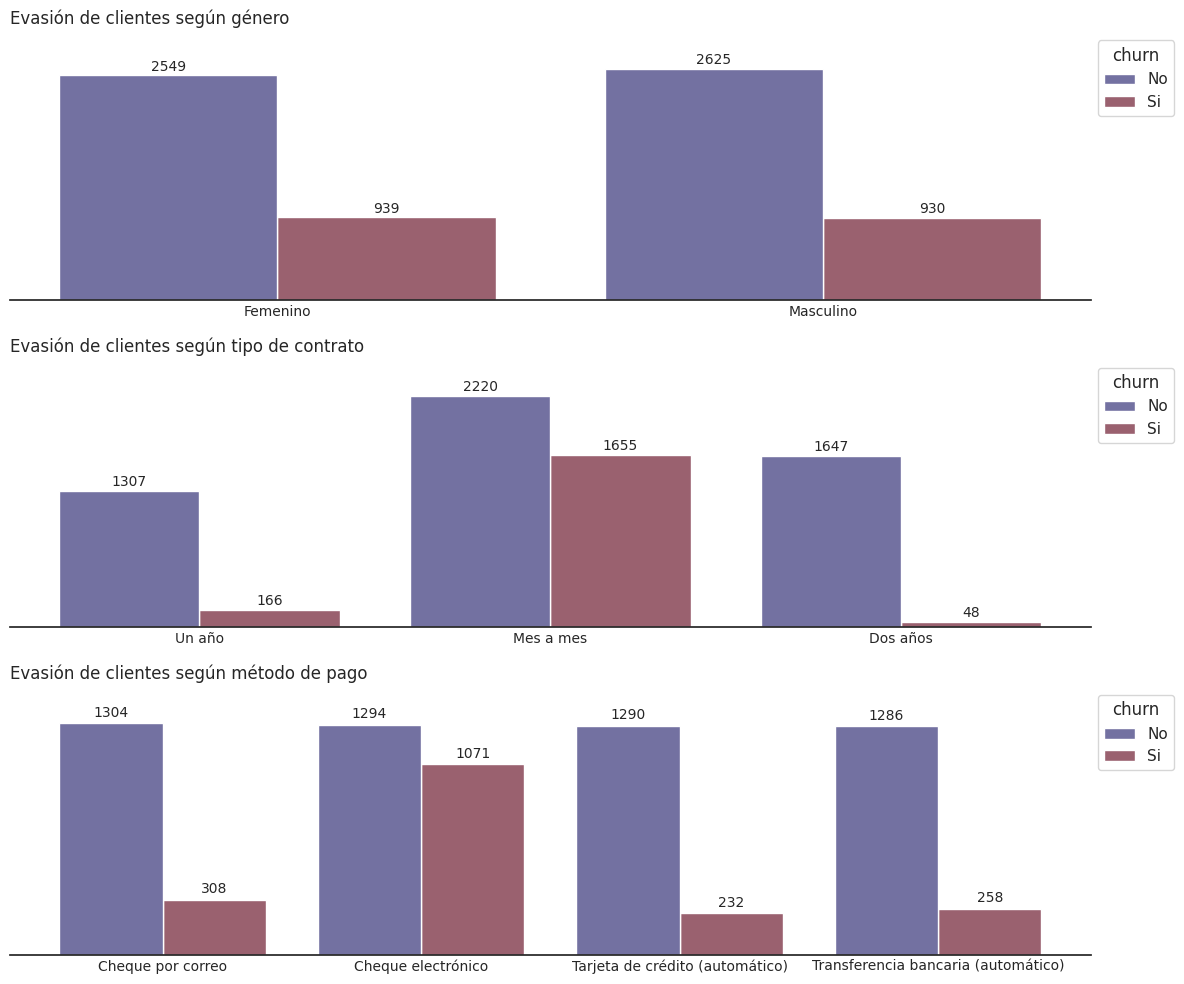

In [42]:
#Creamos la figura, de 1 fila y 3 columnas, asignando el lienzo y ejes a variables.
fig, axs = plt.subplots(3, 1, figsize=(12,10))

columnas = ['gender','contract','paymentmethod']
keywords = ['género','tipo de contrato','método de pago']

'''
Se itera mediante un ciclo for en los ejes de la figura, y se generan los
gráficos con la función myhistplotter. A su vez se personaliza el título en
cada gráfico.
'''
for i, ax in enumerate(axs.flat):
  myhistplotter(data = df_plano, x = columnas[i], hue='churn',ax=ax)
  ax.set_title(f'Evasión de clientes según {keywords[i]}', loc='left', fontsize=12)

plt.tight_layout()

####Gráficos de puntos con [Seaborn](https://seaborn.pydata.org/tutorial/categorical.html)
Se realizaron gráficos de puntos para las **variables de negocio** `PaymentMethod`, `Contract` y `PaperlessBilling` en combinación con las **variables demográficas** `gender`, `SeniorCitizen`, `Partner` y `Dependents`.

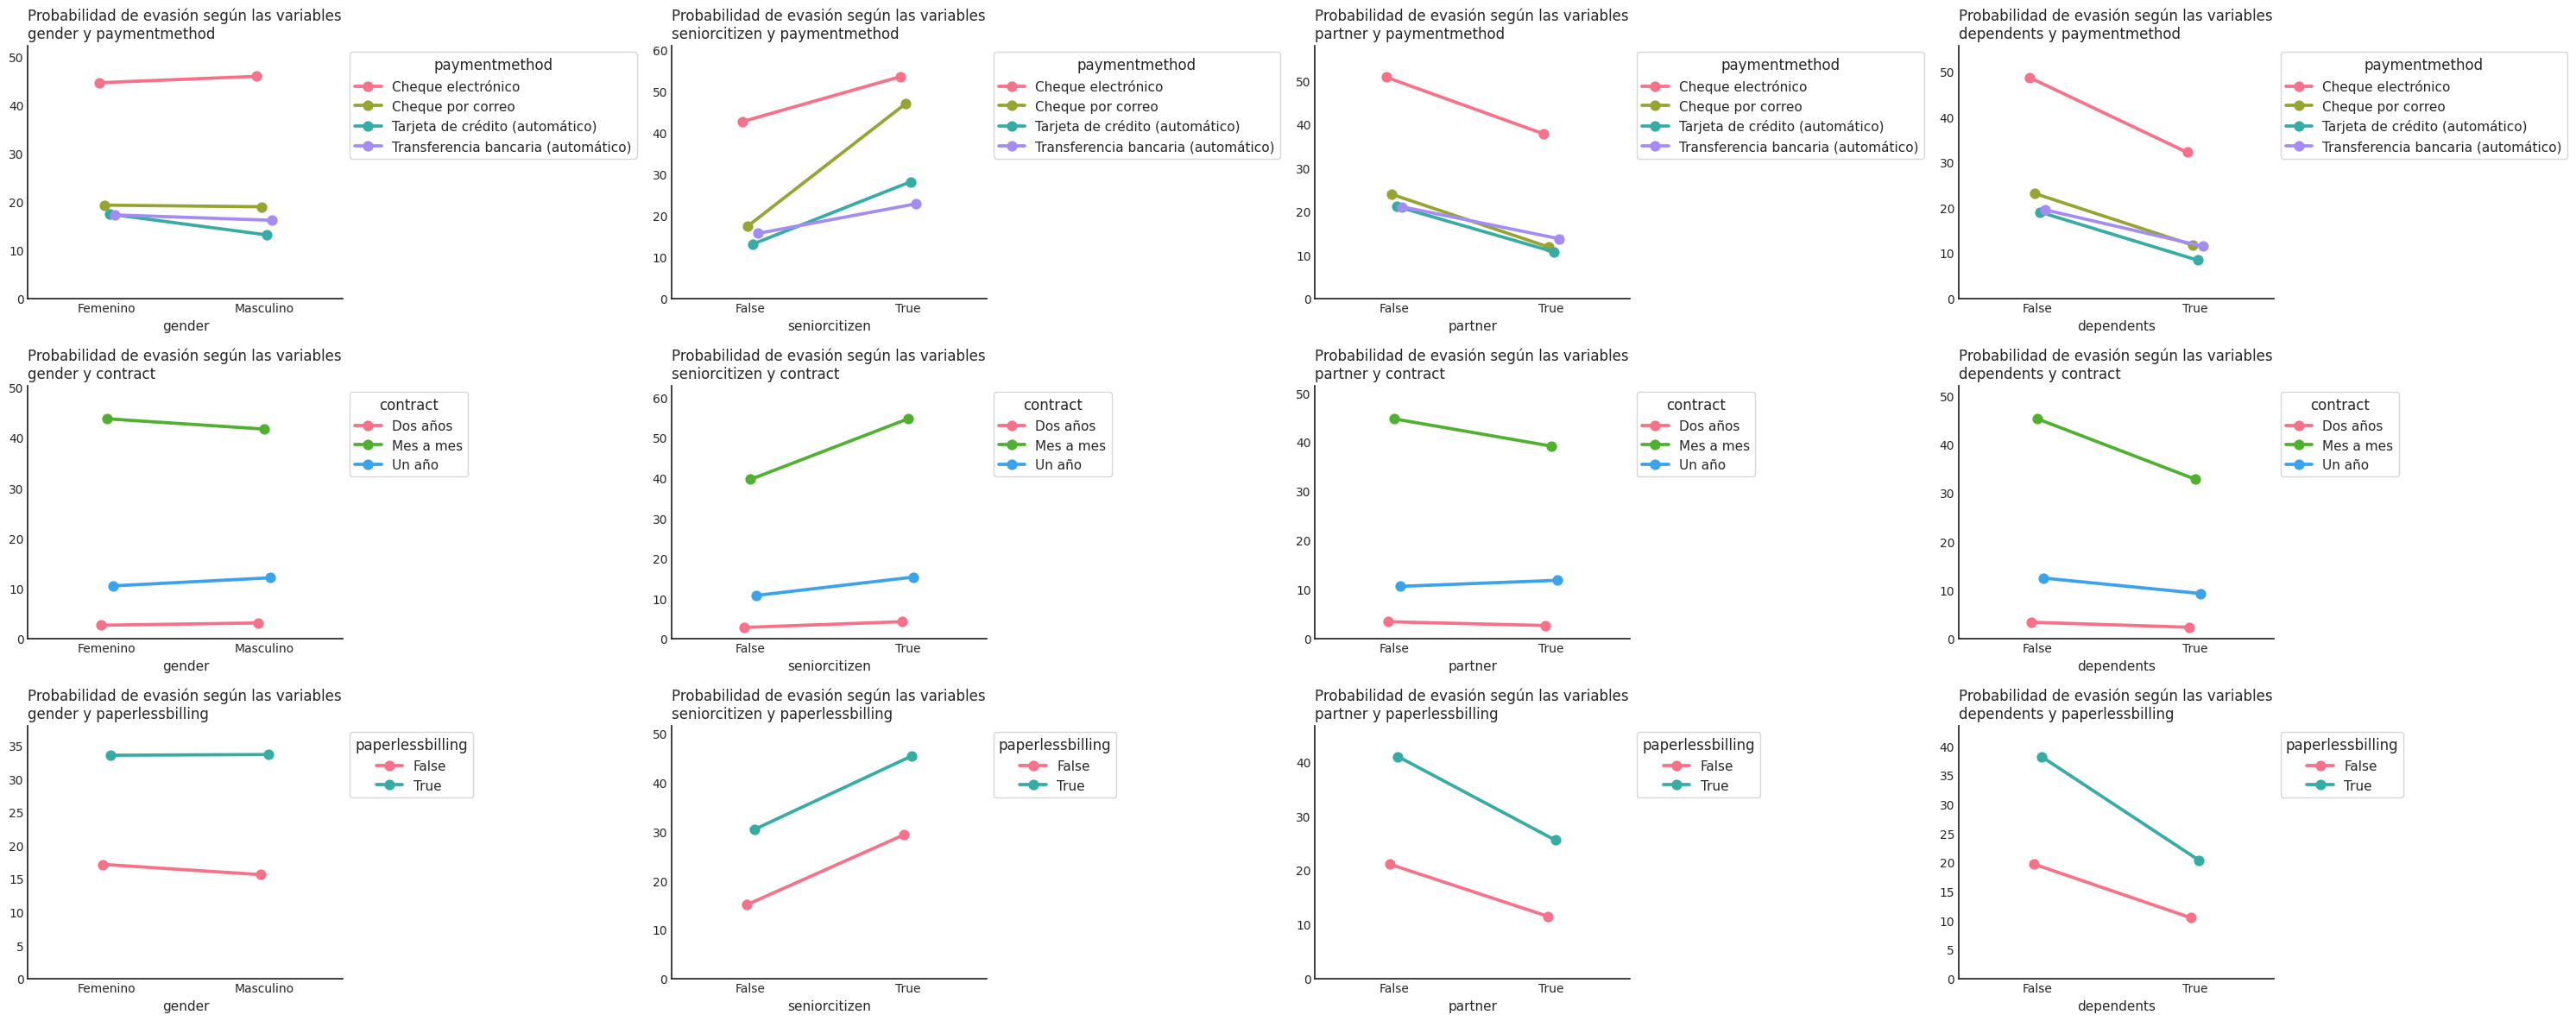

In [43]:
#Creamos la figura, de 4 fila y 3 columnas, asignando el lienzo y ejes a variables.
fig, axs = plt.subplots(3, 4, figsize=(30,12))

df_agrupados_cuali

'''
El dataframe que se ingresa como parámetro es un elemento de la lista
df_agrupados_cuali.
Se itera mediante un ciclo for en los ejes de la figura, y se generan los
gráficos con la función mypointplotter. A su vez se personaliza el título y
etiqueta del x en cada gráfico.
'''
for i, ax in enumerate(axs.flat):
  df = df_agrupados_cuali[i]
  mypointplotter(data = df, x = df.columns[0], y=df.columns[2], hue=df.columns[1],ax=ax)
  ax.set_title(f'Probabilidad de evasión según las variables\n{df.columns[0]} y {df.columns[1]}', loc='left', fontsize=12)
  ax.set_xlabel(df.columns[0],fontsize=11)

plt.tight_layout()

###Conteo de evasión por variable numérica

In [57]:
#Creamos la función mydinamicplotter que permitirá simplificar la sintaxis del código para crear gráficos Ploty.
def mydinamicplotter(fig:go.Figure, valor_x:pd.core.series.Series, valor_y:pd.core.series.Series, col:int, tipo:str='box')-> go.Figure:
  '''
  Función para generar imágenes Plotly del subplot en la fila 1 y columna "col".

  fig:go.Figure
    Figura Plotly con 1 fila y "col" columnas.
  valor_x:pd.core.series.Series
    Serie pandas que se usará como variables del eje X.
  valor_y:pd.core.series.Series
    Serie pandas que se usará como variables del eje Y.
  col:int
    Posición de la columna en la figura.
  tipo:str, default 'box'
    Tipo de gráfico a graficar. Se admiten 'box' y 'Scatter'.
  return = fig: go.Figure
    Figura de Plotly para el subplots en la fila 1 y columna "col".
  '''
  fig = fig

  if tipo == 'box':
    fig.add_trace(go.Box(x=valor_x, y=valor_y), row=1, col=col)
    fig.update_xaxes(title_text=valor_x.name, row=1, col=col)
    fig.update_yaxes(title_text=valor_y.name, range=[0,max(valor_y)*1.05], row=1, col=col)

  elif tipo == 'Scatter':
    fig.add_trace(go.Scatter(x=valor_x, y=valor_y, mode='markers'), row=1, col=col)
    fig.update_xaxes(title_text=valor_x.name, range=[0,max(valor_x)*1.05], row=1, col=col)
    fig.update_yaxes(title_text=valor_y.name, range=[0,max(valor_y)*1.05], row=1, col=col)

  return fig

####Gráficos de cajas y bigotes con Plotly

In [61]:
#Se generan los subtitulos de los gráficos con un ciclo for.
cols_numericas = ['tenure','cuenta_diaria', 'servicios_contratados']
subtitulos = []

for col in cols_numericas:
  subtitulo = f'Boxplot {col} por evasión del cliente'
  subtitulos.append(subtitulo)

#Se crea la imagen Plotly con subplots.
fig = make_subplots(rows=1, cols=len(subtitulos), subplot_titles=subtitulos)

#Se crean los gráficos de la imagen con la función mydinamicplotter.
for i, valor_y in enumerate(cols_numericas):
  mydinamicplotter(fig, df_plano['churn'], df_plano[valor_y], i+1, 'box')
  #Se ajusta el tamaño del titulo del subplot.
  fig['layout']['annotations'][i]['font'] = dict(size=12, color='darkblue')

#Se quita la leyenda de la figura y configura su tamaño.
fig.update_layout(showlegend=False, height=400, width=1100)

####Gráficos de dispersión con Plotly
Se realizaron gráficos de dispersión de la `probabilidad churn` en función de **variables numéricas** como `tenure`, `cuenta_diaria` y `servicios_contratados`.

In [62]:
#Se generan los subtitulos y series Pandas de los gráficos con un ciclo for.
keywords = ['meses con la empresa', 'cobro diario', 'servicios contratados']
subtitulos = []

df_agrupados_cuanti
valores_x = []
valores_y = []

for i in range(len(keywords)):
  subtitulo = f'Probabilidad de evasión según {keywords[i]}'
  subtitulos.append(subtitulo)

  df = df_agrupados_cuanti[i]
  valor_x = df.iloc[:,0]
  valor_y = df.iloc[:,1]

  valores_x.append(valor_x)
  valores_y.append(valor_y)

#Se crea la imagen Plotly con subplots.
fig = make_subplots(rows=1, cols=len(subtitulos), subplot_titles=subtitulos)

#Se crean los gráficos de la imagen con la función mydinamicplotter.
for i, (valor_x, valor_y) in enumerate(zip(valores_x, valores_y)):
  mydinamicplotter(fig, valor_x, valor_y, i+1, 'Scatter')
  #Se ajusta el tamaño del titulo del subplot.
  fig['layout']['annotations'][i]['font'] = dict(size=11, color='darkblue')

#Se quita la leyenda de la figura y configura su tamaño.
fig.update_layout(showlegend=False, height=400, width=1100)

###Gráficos de dispersión y correlación

####Caso especial: Tratamiento de datos

In [64]:
'''
En el dataframe que agrupa la probabilidad de evasión según cobro diario se
eliminaron los registros con probabilidad cero y 100 porque distorsionan el
análisis de correlación.
'''
df_cuentadiaria_churnrate = df_agrupados_cuanti[1]
df_cuentadiaria_churnrate = df_cuentadiaria_churnrate[(df_cuentadiaria_churnrate.churn_rate !=0) & (df_cuentadiaria_churnrate.churn_rate !=100)]
print('El valor mínimo en el df es',min(df_cuentadiaria_churnrate.churn_rate))
print('El valor máximo en el df es',max(df_cuentadiaria_churnrate.churn_rate))

El valor mínimo en el df es 3.571428571428571
El valor máximo en el df es 87.5


####Correlación entre % Churn y Tenure

####Correlación entre % Churn y Cuenta diaria

####Correlación entre % Churn y Cantidad de servicios contratados

##📄Informe final